# Titanic - Projeto Final

## Introdução

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

Tinha 46 mil toneladas, quase 270 metros de comprimento e atravessava os oceanos a uma velocidade média de 39 km/h. RMS Titanic tinha, na sua viagem inaugural começada em Southampton a caminho de Nova Iorque, 892 membros da tripulação e 2.435 passageiros a bordo. Todos iriam testemunhar a travessia no “navio inafundável” que, a par dos navios Olympic e Britannic, seriam os trunfos da White Star Line contra os navios RMS Lusitania e o RMS Mauretania da concorrente Cunard Line. A 10 de abril de 1912, Titanic vira costas ao Reino Unido. Quatro dias depois, às 23h40 de 14 para 15 de abril, o “navio inafundável” não resistiu ao embate num iceberg. Foi um dos maiores desastres marítimos em tempo de paz do mundo.

O conjunto de dados analisado representa os passageiros do Titanic. Vamos responder a algumas perguntas sobre os sobreviventes do desastre e tentar identificar alguns padrões.

In [1]:
# importa as libs necessárias
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np

# para permitir mostrar a saída dos plots
%matplotlib inline

In [2]:
# lê o csv com os dados originais
df_titanic = pd.read_csv("titanic-data-6.csv")

# mostra alguns registros
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# definição de funções
def formata_decimal(value):
    """
        formata um número decimal com duas casas
        argumentos:
            value - o valor a ser formatado
    """
    return "{0:.2f}".format(value)

def formata_porcentagem(value):
    """
        formata um número porcentagem com duas casas
        argumentos:
            value - o valor a ser formatado
    """
    return "{0:.2f}%".format(value)

## Perguntas

- Qual a idade média dos sobreviventes?
- Qual o sexo com mais sobreviventes?
- Qual a porcentagem de crianças sobreviventes?
- Qual a porcentagem de sobreviventes com parentes a bordo?
- Qual a quantidade de sobreviventes por local de embarque?
- Qual a idade média dos sobreviventes de primeira classe que embarcaram em Cherbourg?
- Qual a relação entre sexo e categoria de idade (criança, adolescente, adulto) entre os sobreviventes

## Limpeza dos dados

Vamos remover as colunas Ticket, Fare e Cabin porque não vamos utilizá-las para responder às nossas perguntas.
Para preencher os dados faltantes da coluna Age, vamos utilizar a idade média dos registros que contém o campo.
Para preencher os dados faltantes da coluna Embarked vamos utilizar o local com maior número de embarque.

In [4]:
# remove do dataframe as colunas que não vamos usar
df_titanic_clean = df_titanic.drop(columns=['Ticket', 'Fare', 'Cabin'])

# preenche os registros nulos de idade com a média das idades
df_titanic_clean['Age'].fillna((df_titanic_clean['Age'].mean()), inplace=True)

# verifica qual é o local com maior número de embarques
max_col = df_titanic_clean.groupby('Embarked').count()["Survived"].idxmax()

# preenche os registros nulos de local de embarque com o local de maior número de embarques
df_titanic_clean['Embarked'].fillna(max_col, inplace=True)

# gera um outro csv com os dados recém tratados
df_titanic_clean.to_csv('titanic_clean.csv', index=False)

## Análise

Vamos criar um dataframe contendo apenas os sobreviventes e extrair algumas informações a partir dele.


In [5]:
# abre o arquivo csv com os dados limpos
df_titanic = pd.read_csv('titanic_clean.csv')

# muda o index de default para PassengerId
df_titanic.set_index('PassengerId', inplace=True)

# obtém apenas os registros com sobreviventes
df_survived = df_titanic[df_titanic.Survived==1]

# mostra alguns registros do dataframe
df_survived.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C


# Perguntas

1 - Qual a idade média dos sobreviventes?

Vamos utilizar o método mean para calcular a média sobre a idade a partir do dataframe dos sobreviventes.

In [6]:
# obtém a média de idade a partir do dataframe de sobreviventes
mean = df_survived["Age"].mean()

# formata o número para exibição
formata_decimal(mean)

'28.55'

Podemos concluir que os sobreviventes eram relativamente jovens.

2 - Qual o sexo com mais sobreviventes?

A partir do dataframe de sobreviventes vamos executar queries para extrair o total de registros entre os dois gêneros: masculino e feminino. Vamos então criar um gráfico de "pizza" para mostrar o resultado.

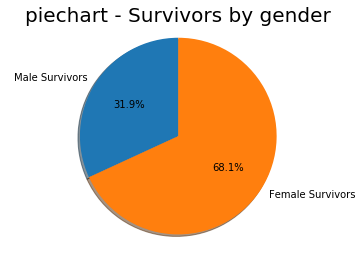

In [7]:
# obtém o total de homens a partir do dataframe de sobreviventes
total_male_survivors = df_survived[df_survived.Sex=="male"].shape[0]
# obtém o total de mulheres a partir do dataframe de sobreviventes
total_female_survivors = df_survived[df_survived.Sex=="female"].shape[0]

# prepara os labels para exibição do pie chart
labels = 'Male Survivors', 'Female Survivors'
# prepara as proporções a serem plotadas no pie chart
sizes = [total_male_survivors, total_female_survivors]
# determina que não é para destacar nenhuma das fatias
explode = (0, 0)

# configura o pie chart e exibe
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('piechart - Survivors by gender',fontsize=20)
plt.show()

Podemos concluir que a maioria dos sobreviventes é do sexo feminino.

3 - Qual a porcentagem de crianças sobreviventes?

Consideramos como crianças os sobreviventes com idade menor ou igual a 12. Calculamos então a porcentagem de crianças sobreviventes em relação ao total de passageiros.

In [8]:
# obtem um dataframe com as crianças sobreviventes
df_children = df_survived.query("Age <= 12")

# obtém o total de passageiros
total_passengers = df_titanic.shape[0]

# calcula a porcentagem de crianças sobreviventes
percentage_children_survived = (df_children.shape[0]*100)/total_passengers

# formata e exibe
formata_porcentagem(percentage_children_survived)

'4.49%'

Concluimos que é muito baixa a porcentagem de crianças sobreviventes.

4 - Qual a porcentagem de sobreviventes com parentes a bordo?

Vamos investigar a porcentagem de sobreviventes com parentes (esposa, marido, crianças, pais) a bordo e calcular a porcentagem destes em relação ao total de passageiros.

In [9]:
# obtem um dataframe contendo sobreviventes com parentes a bordo
df_relatives = df_survived[(df_survived['SibSp'] > 0) | (df_survived['Parch'] > 0)]

# calcula a porcentagem
percentage_survivors_with_relatives = (df_relatives.shape[0]*100)/total_passengers

# formata e exibe
formata_porcentagem(percentage_survivors_with_relatives)

'20.09%'

Concluímos que também é baixa a taxa de sobrevivência dos passageiros com parentes a bordo.

5 - Qual a quantidade de sobreviventes por local de embarque?

Vamos investigar se o local de embarque tem proeminência sobre o total de sobreviventes.

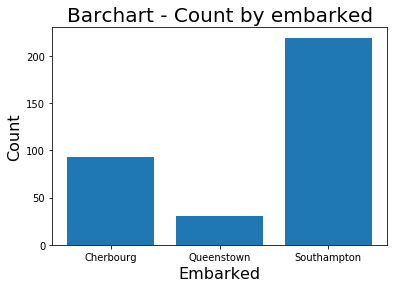

In [10]:
# obtem um dataframe com totais agrupados pelo local de embarque
g = df_survived.groupby(['Embarked']).size().reset_index(name='count')

# configura o barchart e exibe
embarked = ['Cherbourg','Queenstown','Southampton']
pos = np.arange(len(embarked))
 
plt.bar(g['Embarked'],g['count'])
plt.xticks(pos, embarked)
plt.xlabel('Embarked', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Barchart - Count by embarked',fontsize=20)
plt.show()



Concluímos que foi bem maior o número de sobreviventes que embarcaram em Southampton.

6 - Qual a idade média dos sobreviventes de primeira classe que embarcaram em Cherboug?

Vamos obter a média de idade dos passageiros que embarcaram em Cherboug e são de primeira classe, entre o dataframe de sobreviventes.

In [11]:
# obtem um dataframe com passageiros sobreviventes de primeira classe que embarcaram em Cherboug
df_first_class_cherboug = df_survived[(df_survived["Embarked"]=="C") & (df_survived["Pclass"]==1)]

# obtem a média de idade
mean = df_first_class_cherboug["Age"].mean()

# formata e exibe
formata_decimal(mean)

'35.27'

Podemos concluir que são relativamente jovens os sobreviventes de primeira classe que embarcaram em Cherboug.

7 - Qual a relação entre sexo e categoria de idade (criança, adolescente, adulto) entre os sobreviventes 

Queremos investigar a proporção de sobreviventes entre crianças, adolescentes e adultos.
Vamos usar a seguinte lógica para classificar os sobreviventes:

* crianças - 0 a 12 anos, inclusive.
* adolescentes - 13 a 18 anos, inclusive.
* adultos - maior que 18 anos.

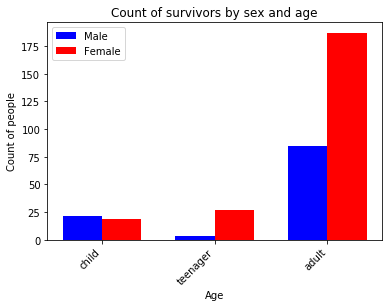

In [12]:
# obtem o total de crianças meninos sobreviventes
male_children_survived = df_survived[(df_survived["Age"]<=12) & (df_survived["Sex"]=="male")].shape[0]

# obtem o total de adolescentes homens sobreviventes
male_teenager_survived = df_survived[(df_survived["Age"]>12) & (df_survived["Age"]<=18) & (df_survived["Sex"]=="male")].shape[0]

# obtem o total de adultos homens sobreviventes
male_adult_survived = df_survived[(df_survived["Age"]>18) & (df_survived["Sex"]=="male")].shape[0]

# obtem o total de crianças meninas sobreviventes
female_children_survived = df_survived[(df_survived["Age"]<=12) & (df_survived["Sex"]=="female")].shape[0]

# obtem o total de adolescentes mulheres sobreviventes
female_teenager_survived = df_survived[(df_survived["Age"]>12) & (df_survived["Age"]<=18) & (df_survived["Sex"]=="female")].shape[0]

# obtem o total de adultos mulheres sobreviventes
female_adult_survived = df_survived[(df_survived["Age"]>18) & (df_survived["Sex"]=="female")].shape[0]

# organiza os dados para exibição do bar chart
male = [male_children_survived, male_teenager_survived, male_adult_survived]
female = [female_children_survived, female_teenager_survived, female_adult_survived]

# configura o bar chart e exibe
category = ['child', 'teenager', 'adult']

pos = np.arange(3)
size = .35

fig, ax = plt.subplots()

plt1 = ax.bar(pos-size/2, male, size, color='blue', label='Male')
plt2 = ax.bar(pos+size/2, female, size, color='red', label='Female')

ax.set_title('Count of survivors by sex and age')
ax.set_xlabel('Age')
ax.set_ylabel('Count of people')

ax.set_xticks(pos) 
ax.set_xticklabels(category, rotation=45, ha='right') 
ax.legend()

Podemos concluir que entre os sobreviventes crianças, há a mesma proporção de meninos e meninas. Para os adolescentes e adultos, é bem maior a proporção de mulheres.

## Resultados

Respondendos às perguntas que fizemos no início:

- Qual a idade média dos sobreviventes?

Os sobreviventes tem idade média de 28.55 anos

- Qual o sexo com mais sobreviventes?

O gênero com mais sobreviventes é o feminino, com 68,1%

- Qual a porcentagem de crianças sobreviventes?

A porcentagem de crianças sobreviventes é baixa, 4,49%.

- Qual a porcentagem de sobreviventes com parentes a bordo?

A porcentagem de sobreviventes com parentes a bordo também é baixa, 20.09%

- Qual a quantidade de sobreviventes por local de embarque?

A grande maioria dos sobreviventes embarcou em Southampton. Em seguida, por ordem de quantidade, temos Queenstown e Cherbourg.

- Qual a idade média dos sobreviventes de primeira classe que embarcaram em Cherbourg?

A idade médias dos sobreviventes de primeira classe embarcados em Cherbourg é de 35.27 anos

- Qual a relação entre sexo e categoria de idade (criança, adolescente, adulto) entre os sobreviventes

Entre as crianças temos números semelhantes de sobreviventes entre os gêneros. Para os adolescentes e adultos, temos um número bem maior de mulheres sobreviventes.

### Dificuldades encontradas na análise e conclusões

As respostas às perguntas que tem relação com a idade são uma aproximação, já que havia muitos registros com valor nulo para a idade. Para o local de embarque haviam apenas 2 registros faltando, então podemos considerar como relativamente fidedignos os resultados que tem relação com o local de embarque. Para a pergunta sobre sobreviventes com parentes a bordo, levamos em consideração as colunas

* sibsp	- número de irmãos / parceiros/esposas a bordo do Titanic
* parch	- número de pais / filhos a bordo do Titanic

A partir das análises observadas concluímos que a maioria dos sobreviventes é do sexo feminino, são relativamente jovens e embarcaram em Southampton.

## Bibliografia


[RMS Titanic - Wikipedia a enciclopédia livre](https://pt.wikipedia.org/wiki/RMS_Titanic)

[Titanic. 105 anos depois, 27 fotos dos dias a seguir ao desastre](https://observador.pt/2017/04/17/105-anos-depois-27-fotos-dos-dias-a-seguir-ao-desastre-do-titanic/)

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

[Predicting the Survival of Titanic Passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

[Exploring Titanic Data Using Pandas Dataframes](https://www.kaggle.com/inturiyam/exploring-titanic-data-using-pandas-dataframes/data)

[Looking for Survivors with Titanic Data Analysis](https://jasonicarter.github.io/survival-analysis-titanic-data/)